# RFM Analysis Case Study

## Tasks:
### 1. Data preprocessing
### 2. Build a Recency Frequency Monetary Model 
### 3. Perform customer segmentation with KMeans Clustering
### 4. Create segments to determine total customer value for the retail

In [ ]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [3]:
# Load the datasets


In [4]:
# Explore the datasets as per the below outputs


Shape of train data
-------------------
(379336, 8)
-------------------
Columns of train data
---------------------
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
-------------------
Types of train columns
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB
None
--------------

In [5]:
# Basic sumary statiscal analysis as shown below


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,379336.0,379336,378373,379336.000000,379336,379336.000000,285076.000000,379336
unique,23857.0,4008,4132,NaN,21712,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,774.0,1611,1649,NaN,774,NaN,NaN,346854
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.517272,NaN,4.681474,15288.302463,NaN
std,NaN,NaN,NaN,259.070548,NaN,105.799352,1712.323663,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13958.750000,NaN


In [6]:
# Looking for missing values along with NaN from the dataset as shown below


InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64
InvoiceNo          0
StockCode          0
Description      491
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40820
Country            0
dtype: int64


In [7]:
# Drop null values for customer id since it is not an important categorical data and use mode to replace the null values in description



In [8]:
# Display duplicate records as shown below


       InvoiceNo StockCode                          Description  Quantity  \
2878      575117     21098                CHRISTMAS TOILET ROLL         1   
5729      542107     21755             LOVE BUILDING BLOCK WORD         1   
7615      577778     21733     RED HANGING HEART T-LIGHT HOLDER         1   
8997      578781     22988                    SOLDIERS EGG CUP          1   
14797     575583     20893  HANGING BAUBLE T-LIGHT HOLDER SMALL         1   
...          ...       ...                                  ...       ...   
378899    577773     23507     MINI PLAYING CARDS BUFFALO BILL          1   
379020    571682     23182       TOILET SIGN OCCUPIED OR VACANT         1   
379073    564729     22208             WOOD STAMP SET THANK YOU         2   
379205    538368     22759         SET OF 3 NOTEBOOKS IN PARCEL         1   
379226    578041     22726           ALARM CLOCK BAKELIKE GREEN         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
2878   

In [9]:
# Drop duplicate rows


Text(0.5, 1.0, 'Boxplot for Train set')

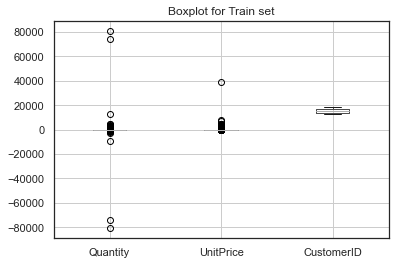

In [12]:
# Display train dataset outliers with the box plot method as shown below



Text(0.5, 1.0, 'Boxplot for test set')

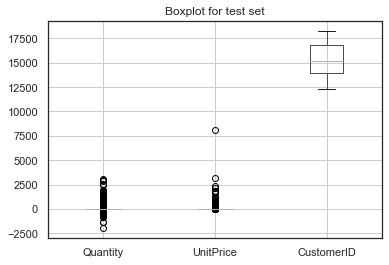

In [13]:
# Display test dataset outliers with the box plot method as shown below


In [15]:
# Create monthly groupings on the basis of customer id and invoice date while converting cust_id to integer



In [16]:
# Looking for unique values in invoice date on the basis of years and months as shown below



19427
[2011 2010]
[ 6  5  1 12  9 10  2 11  7  8  3  4]


In [17]:
# Using the above to extract string from time and showing the number of unique months as shown below



array(['2011-06', '2011-05', '2011-01', '2010-12', '2011-09', '2011-10',
       '2011-02', '2011-11', '2011-07', '2011-08', '2011-03', '2011-04',
       '2011-12'], dtype=object)

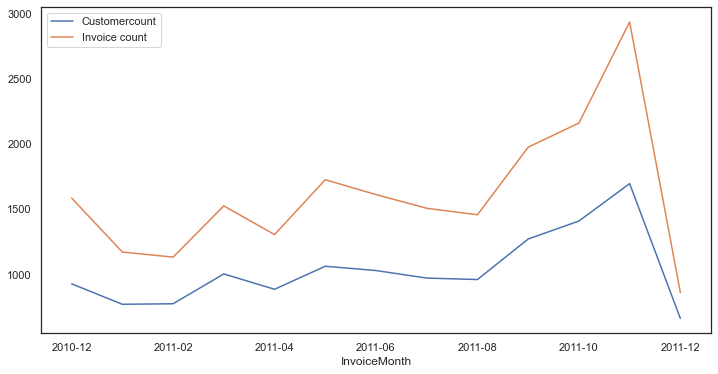

In [18]:
# Plot the customer count and invoice count across the unique months as shown below


## **Building Recency Frequency Monetary (RFM) **

In [28]:
# Calculate the total sales for both train and test datasets. Dispaly the below using the train dataset as shown below


,InvoiceNo,InvoiceDate,CustomerID,Sales
1,556072,2011-06-08 14:57:00,16126,30.00
2,551739,2011-05-04 10:58:00,18118,5.10
3,541658,2011-01-20 12:16:00,15529,0.85
4,538364,2010-12-10 17:26:00,14448,19.50
5,552306,2011-05-08 15:20:00,13911,15.00


In [29]:
# Recency has to be claculated from a specific date. Show the below anchor/reference date


Timestamp('2011-12-10 12:50:00')

In [30]:
# Grouping by cust id and create a new table as shown below


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,2,0.00
12347,2,132,3124.96
12348,75,20,1009.88
12349,19,50,1344.17
12350,310,11,213.30


#### Give recency, frequency, and monetary scores individually by dividing them into quartiles, Combine three ratings to get a RFM segment (as strings), Get the RFM score by adding up the three ratings, Analyze the RFM segments by summarizing them and comment on the findings

#### Rate “recency" for customer who has been active more recently higher than the less recent customer. Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [32]:
# Calculate RFM groups,labels and quartiles with the qcut function where recency_labels = range(4, 0, -1), 
# frequency_labels = range(1, 5), montary_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups for recency

# Assign these labels to 4 equal percentile groups for frequency

# Assign these labels to three equal percentile groups for montary value


In [33]:
#Display the below output


CustomerID
12346    1
12347    4
12348    2
12349    3
12350    1
Name: Recency, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]
CustomerID
12346    1
12347    4
12348    2
12349    3
12350    1
Name: Frequency, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]
CustomerID
12346    1
12347    4
12348    3
12349    4
12350    2
Name: MonetaryValue, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]


In [34]:
# Adding the new columns to original rmf as shown below


,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346,326,2,0.00,1,1,1
12347,2,132,3124.96,4,4,4
12348,75,20,1009.88,2,2,3
12349,19,50,1344.17,3,3,4
12350,310,11,213.30,1,1,2


In [35]:
# Combine three ratings to get a RFM segment as shown below


,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
CustomerID,,,,,,,
12346,326,2,0.00,1,1,1,111
12347,2,132,3124.96,4,4,4,444
12348,75,20,1009.88,2,2,3,223
12349,19,50,1344.17,3,3,4,334
12350,310,11,213.30,1,1,2,112


In [36]:
# Get the RFM score by adding up the three ratings as shown below.


,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
CustomerID,,,,,,,,
12346,326,2,0.00,1,1,1,111,3
12347,2,132,3124.96,4,4,4,444,12
12348,75,20,1009.88,2,2,3,223,7
12349,19,50,1344.17,3,3,4,334,10
12350,310,11,213.30,1,1,2,112,4


In [37]:
# show the number of unique segments, unique RFM_Scores, and print the best customers as shown below




61
[ 3 12  7 10  4 11  6  8  9  5]


,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
CustomerID,,,,,,,,
12347,2,132,3124.96,4,4,4,444,12
12359,8,181,4681.17,4,4,4,444,12
12362,3,183,3463.01,4,4,4,444,12
12388,16,78,2235.13,4,4,4,444,12
12395,16,113,2189.10,4,4,4,444,12


In [38]:
# Define rfm_level function on the basis of importance using the following criteria: Important (RFM_Score>= 9), 
# Good (RFM_Score >= 8 and < 9), Okay (RFM_Score >= 7 and < 8), Neutral (RFM_Score >= 6 and < 7),
# Might (RFM_Score >= 5) and < 6), Needs Attention (RFM_Score >= 4 and < 5) Otherwise Activate
    

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,326,2,0.00,1,1,1,111,3,Activate
12347,2,132,3124.96,4,4,4,444,12,Important
12348,75,20,1009.88,2,2,3,223,7,Okay
12349,19,50,1344.17,3,3,4,334,10,Important
12350,310,11,213.30,1,1,2,112,4,Needs Attention


In [39]:
# Calculate average values for each RFM_Level, and return a size of each segment as shown below


Recency Frequency MonetaryValue      
                   mean      mean          mean count
RFM_Level                                            
Activate          264.9       5.6          74.0   393
Good               61.5      39.8         670.5   496
Important          25.6     136.6        2901.9  1668
Might             145.3      14.5         233.4   505
Needs Attention   180.3       9.9         156.7   399
Neutral           100.0      20.1         368.7   458
Okay               80.6      27.9         505.9   434

In [ ]:
# Plot the above information and draw your insight


#### ** Modeling training data with Kmeans **

In [43]:
# Explore the optimum number of clusters/cluster sum of squares (WCSS) with max_iter   = 300 and n_init =10


In [ ]:
# Plot the above results into a line graph and determine the optimum number of clusters




C:\Users\asus_pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


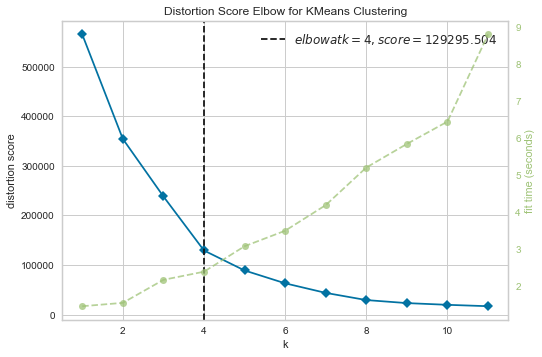

In [45]:
# Fit the data to the graph as shown below using Yellowbrick
# Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate machine learning with scikit-learn


In [46]:
# Repeating the above steps for test data



In [47]:
# Applying kmeans as previously expressed



In [48]:
# Create a new cloumn for your predictions


In [49]:
# As shown below, show the number of Cluster along with the number of customers in it. What's your insight here?


2    64572
1    55959
0      708
3       46
Name: Cluster, dtype: int64

In [50]:
# Perform any other necessary insightful analysis